In [37]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad

In [38]:
common_settings = {
# 'omega_b':0.0223828,
'h':0.67810,
'z_reio':7.6711,
'YHe':0.25,
'perturbations_verbose':1,
'background_verbose':3,
'output':'mTk, vTk, mPk',
'gauge':'newtonian',
'P_k_max_1/Mpc':10,
'z_max_pk':1000,
'format':'class',
}

In [49]:
chiCDM = Class()
# pass input parameters
chiCDM.set(common_settings)

chiCDM.set({
# 'N_ur': 3.046,
# 'Omega_cdm':0.60,
# 'Omega_b':0.15,

# 'omega_cdm':0.08,
# 'T_cmb':1.9,
})
chiCDM.compute()



Running CLASS version v3.2.0
Computing background
Chose ndf15 as generic_evolver
 -> age = 13.770598 Gyr
 -> conformal age = 14151.897989 Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3405.751104
    corresponding to conformal time = 112.722902 Mpc
 ---------------------------- Budget equation ----------------------- 
 ---> Nonrelativistic Species 
-> Bayrons                        Omega = 0.0486773       , omega = 0.0223828      
-> Cold Dark Matter               Omega = 0.261206        , omega = 0.120107       
 ---> Relativistic Species 
-> Photons                        Omega = 5.37815e-05     , omega = 2.47298e-05    
-> Ultra-relativistic relics      Omega = 3.71799e-05     , omega = 1.70961e-05    
 ---> Other Content 
-> Cosmological Constant          Omega = 0.690026        , omega = 0.317287       
 ---> Total budgets 
 Radiation                        Omega = 9.09615e-05     , omega = 4.18259e-0

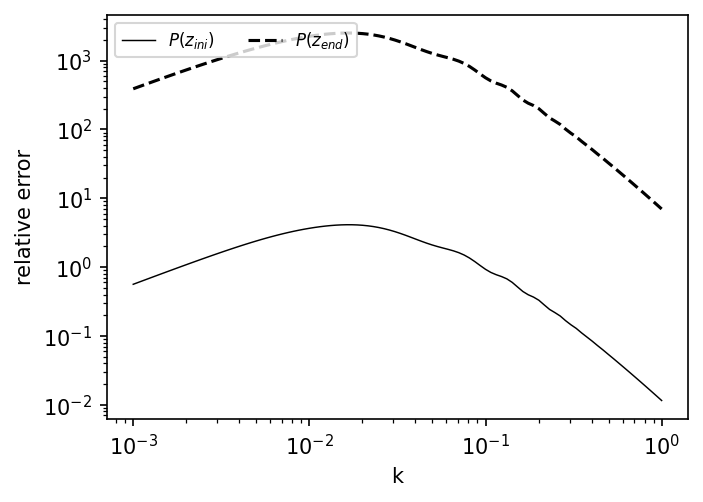

In [54]:
z_ini = 100
z_end = 3
a_ini = 1/(z_ini+1);a_end = 1/(z_end+1)
kk = np.logspace(-3,0,100) # k in h/Mpc
Pk_ini = [] # P(k) in (Mpc/h)**3
Pk_end = [] # P(k) in (Mpc/h)**3

h = chiCDM.h() # get reduced Hubble for conversions to 1/Mpc

for k in kk:
    Pk_ini.append(chiCDM.pk_lin(k*h,z_ini)*h**3) # function .pk(k,z)
    Pk_end.append(chiCDM.pk_lin(k*h,z_end)*h**3) # function .pk(k,z)

Pk_ini=np.array(Pk_ini);Pk_end=np.array(Pk_end)


D_EdS = a_end/a_ini
P_end_D_EdS = Pk_ini * D_EdS**2

background = chiCDM.get_background() # load background table
a = 1/(background['z']+1) # read redshift
D_class_int = interp1d(a,background['gr.fac. D'])
P_end_D_num = Pk_ini * (D_class_int(a_end)/D_class_int(a_ini))**2

# error_pure_cdm=np.abs(P_end_D_EdS/Pk_end-1)

plt.figure(figsize=(5.,3.5), dpi=150)

plt.loglog(kk, Pk_ini,'k',label=r'$P(z_{ini})$', linewidth=0.7)
plt.plot(kk, Pk_end,'k--',label=r'$P(z_{end})$')
# plt.plot(kk, P_end_D_EdS,'navy',label=r'EdS')
# plt.plot(kk, P_end_D_num,'green',label=r'Dclass')

# plt.plot(kk, np.abs(P_end_D_EdS/Pk_end-1),'navy',linestyle='-',label=r'EdS', linewidth=1.)


# plt.axhline(y=1, color='k', linewidth=0.7)
plt.xscale('log')
plt.yscale('log')
# plt.ylim([3.e-3,1])
plt.xlabel('k')
plt.ylabel('relative error')
plt.legend(loc='upper left', fontsize=8, ncol=2)
# plt.text(0.05, 0.05, r'$f_\chi = 10\%, \; z_{ini}=100,\; z_{end}=3$', transform=plt.gca().transAxes)

# plt.savefig('/home/fverdian/class/soundspeed-scripts/figure/growthfacr-error-fx01.pdf',bbox_inches='tight')
plt.show()

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])


[]

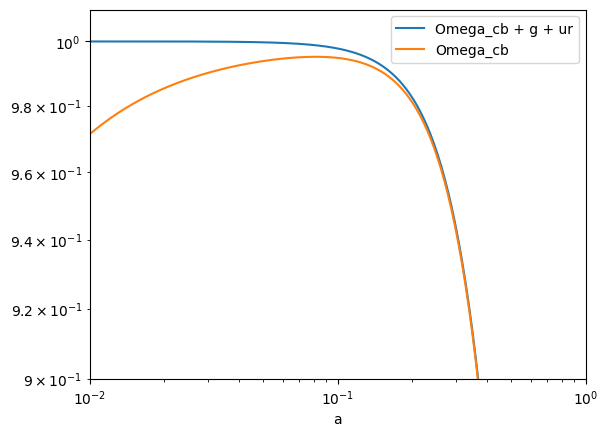

In [51]:
aeval=np.logspace(-2,0,200)
# plt.loglog(aeval,D_class_int(aeval)/D_class_int(0.01))
# plt.loglog(aeval,aeval/0.01)
# plt.loglog(aeval,np.abs(D_class_int(aeval)/D_class_int(0.01)/aeval*0.01-1))

plt.loglog(a,(background['(.)rho_cdm']+background['(.)rho_b']+background['(.)rho_g']+background['(.)rho_ur'])/background['(.)rho_crit'],label='Omega_cb + g + ur')
plt.loglog(a,(background['(.)rho_cdm']+background['(.)rho_b'])/background['(.)rho_crit'], label='Omega_cb')

plt.xlim([1.e-2,1])
plt.ylim([9.e-1,1.01])
plt.legend()
plt.xlabel('a')
print(background.keys())
plt.plot()